## Q1

In [22]:
import pandas as pd
%pylab inline

df_gold = pd.read_csv('gold.txt', sep='\t', header=None, names=['url','category'])
df_label = pd.read_csv('labels.txt', sep='\t', header=None, names=['turk','url','category'])
print df_gold.head()
print df_label.head()

Populating the interactive namespace from numpy and matplotlib
                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


E:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Q2

In [2]:
def split(x):
    return (x in df_gold['url'].values)
mask = df_label['url'].apply(split)
labels_gold = df_label[mask]
labels_unknown = df_label[-mask]
print labels_gold.head()
print labels_unknown.head()

               turk                        url category
245  A1253FXHCZ9CWM  http://0800-horoscope.com        G
246  A153PKAL7OAY36  http://0800-horoscope.com        G
247  A1FV9SAPL5C6KY  http://0800-horoscope.com        G
248  A1JTOT0DWM6QGL  http://0800-horoscope.com        G
249  A1PXXEOGQ76RNJ  http://0800-horoscope.com        G
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


## Q3

In [3]:
labels_gold.groupby(['turk'])['url'].agg({"number of ratings":'count'})
labels_correct = labels_gold.merge(df_gold, left_on='url', right_on='url', suffixes=['', '_gold'])
labels_correct['correct'] = (labels_correct['category'] == labels_correct['category_gold'])
rater_goodness = labels_correct.groupby(['turk'])['correct'].agg({"number of ratings":'count', "correct rate":'sum'})
rater_goodness['correct rate'] = rater_goodness['correct rate']/rater_goodness['number of ratings']
rater_goodness.head(10)

E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,number of ratings,correct rate
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


## Q4

In [4]:
rater_goodness['odds'] = rater_goodness['correct rate']/(1.001 - rater_goodness['correct rate'])
rater_goodness.head(10)

,number of ratings,correct rate,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Q5

In [5]:
rater_goodness[rater_goodness['number of ratings'] >= 20] \
              .sort_values(by='odds', ascending = False).head(10)

,number of ratings,correct rate,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


## Q6

It's not much correlated.

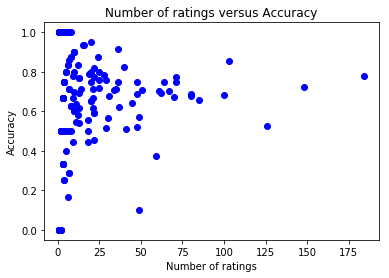

In [6]:
plot(rater_goodness['number of ratings'], rater_goodness['correct rate'], marker='o', color='blue', linestyle='None')
xlabel('Number of ratings')
ylabel('Accuracy')
title('Number of ratings versus Accuracy')
show()

## Q7

In [7]:
reliable_rater = rater_goodness[rater_goodness['number of ratings'].rank(pct=True) > 0.75]
labels_unknown.set_index('turk', inplace = True)
overall_odds = labels_unknown.merge(reliable_rater, on='turk')

In [8]:
overall_odds = overall_odds.groupby(['url','category'])[['odds']].agg('product')
overall_odds.rename(columns={"odds": "overall odds"},inplace= True)

In [9]:
overall_odds

overall odds
url                                                category              
http://0-101.net                                   G             2.155963
http://000.cc                                      G             1.460583
http://0000.jp                                     G            14.488244
http://000relationships.com                        G             9.914590
                                                   P             1.851852
http://000vitamins.com                             G             3.784982
http://000webhost.com                              G            11.159502
http://003my.com                                   G             4.912040
http://007absolutehardcore.com/early_cumshots/i... P             3.346522
                                                   R            12.290450
                                                   X           293.252871
http://007swz.cn                                   G             1.393883
http://01768.com                                   G             1.393883
http://0198.cc                                     G             2.947446
http://01house.cn                                  G             3.874200
http://01net.com                                   G             2.463388
http://01yyy.com                                   G             3.874200
                                                   R             1.304682
http://020dna.com                                  G             5.054597
                                                   R             1.620746
http://020hp.net                                   G             2.463388
http://020shenghuo.com                             G             1.393883
http://021cd.com                                   G             3.378660
http://024haha.cn                                  G             1.460583
http://028114.com                                  G             1.854185
http://028town.com                                 G             3.626269
http://029bus.cn                                   G             1.097994
                                                   P             1.330229
http://029zp.com                                   G             1.047852
http://02et.cn                                     G             2.581266
...                                                                   ...
http://zoomerang.com                               G             6.271191
http://zoominfo.com                                G            50.648819
http://zoosk.com                                   G             1.818574
                                                   P             1.620746
http://zoower.com                                  G            11.861160
http://zooz.vn                                     G             4.350366
http://zoozle.org                                  G            33.942585
http://zorkabiz.ru                                 G             5.054597
http://zouri.jp                                    G             1.432532
http://zoznam.sk                                   G             2.652501
                                                   R             2.988048
http://zqt9.com                                    G             2.912430
http://zses.com                                    G             4.860281
http://zshare.net                                  G             2.423919
http://zshareblog.com                              G             1.916219
http://zsmhl.com                                   G             2.419121
                                                   P             1.620746
http://ztomy.com                                   G            28.657475
http://zucaiba.com                                 G             1.432532
http://zumin-ads.com                               G             2.779429
http://zune.net                                    G            20.209842
http://zvezdanews.ru                               G             

## Q8

In [23]:
result_75 = overall_odds.reset_index(level=1)
result_75 = result_75.groupby(['url'])[['overall odds']].max()
result_75[['category','overall odds']].max()
result_75

KeyError: "['category'] not in index"

## Q9

In [14]:
reliable_rater_25 = rater_goodness[rater_goodness['number of ratings'].rank(pct=True) > 0.25]
overall_odds_25 = labels_unknown.merge(reliable_rater_25, on='turk')
overall_odds_25 = overall_odds_25.groupby(['url','category'])[['odds']].agg('product')
overall_odds_25.rename(columns={"odds": "overall odds"},inplace= True)
result_25 = overall_odds_25.reset_index(level=1)
result_25 = result_25.groupby(['url'])[['category','overall odds']].max()
result_25

,category,overall odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,P,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,R,1.851852e+00
http://000vitamins.com,G,5.014149e+00
http://000webhost.com,G,1.113723e+07
http://003my.com,G,4.912040e+00
http://007absolutehardcore.com/early_cumshots/index.html,X,5.847515e+02
http://007swz.cn,G,1.391101e+00


In [17]:
result_merge = result_75.merge(result_25, on='url', suffixes=['_75', '_25'])
#result_merge_group = result_merge.set_index(['category_25','category_75']).groupby(['category_25','category_75']).count()
#result_merge_group.drop('overall odds_75', axis=1, inplace=True)
#result_merge_group.rename(columns={"overall odds_25": "url numbers"},inplace= True)
#result_merge_group.unstack('category_25')
result_merge

,category_75,overall odds_75,category_25,overall odds_25
url,,,,
http://0-101.net,G,2.155963,G,2.155963e+00
http://000.cc,G,1.460583,P,2.181050e+03
http://0000.jp,G,14.488244,G,2.877556e+07
http://000relationships.com,P,9.914590,R,1.851852e+00
http://000vitamins.com,G,3.784982,G,5.014149e+00
http://000webhost.com,G,11.159502,G,1.113723e+07
http://003my.com,G,4.912040,G,4.912040e+00
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871,X,5.847515e+02
http://007swz.cn,G,1.393883,G,1.391101e+00


In [16]:
a = result_merge[['category_25', 'category_75']].reset_index()
pd.crosstab(a['category_25'], a['category_75'])

category_75,G,P,R,X
category_25,,,,
G,6189,0,0,0
P,894,1183,0,0
R,363,201,482,0
X,233,79,130,856


In [64]:
table = pd.crosstab(result_merge['category_25'], result_merge['category_75'] )

In [65]:
table

category_75,G,P,R,X
category_25,,,,
G,6189,0,0,0
P,894,1183,0,0
R,363,201,482,0
X,233,79,130,856
